Cargamos las librerias y el dataset nuevo ya limpio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [4]:
df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')

/tmp/ipython-input-2911200300.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')


In [5]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,736185,106,4150080.00,31680,131.00,...,3,6,0.217,1,0,1.0,7,56021.0,0.733077,26
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,736173,126,5750057.68,43436,132.38,...,4,6,0.667,1,1,0.0,7,71539.0,0.707238,22
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,736309,48,10300158.00,52021,198.00,...,3,6,0.500,1,0,0.0,7,48160.0,2.391765,4
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,736237,138,2975068.00,22202,134.00,...,1,6,0.273,1,0,0.0,6,51238.0,2.150789,21
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,736204,286,3920076.00,48396,81.00,...,2,2,0.333,0,1,1.0,1,62588.0,0.763286,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318539 entries, 0 to 318538
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url                               318539 non-null  object 
 1   id                                318539 non-null  object 
 2   Lng                               318539 non-null  float64
 3   Lat                               318539 non-null  float64
 4   Cid                               318539 non-null  int64  
 5   tradeTime                         318539 non-null  int64  
 6   followers                         318539 non-null  int64  
 7   totalPrice                        318539 non-null  float64
 8   price                             318539 non-null  int64  
 9   square                            318539 non-null  float64
 10  livingRoom                        318539 non-null  int64  
 11  drawingRoom                       318539 non-null  i

Esta todo ok

Definimos X e y

In [7]:
columnas_X = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
              'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
              'district', 'communityAverage', 'distancia_km_a_subte_mas_cercano', 'piso']
columna_Y = 'totalPrice'
columna_Y2 = 'price'

In [8]:
X = df[columnas_X]
y = df[columna_Y]
y2 = df[columna_Y2]

In [9]:
X

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1,1.0,2005.000000,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,1,2,1.0,2004.000000,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,1,3,4.0,2005.000000,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1,1.0,2008.000000,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,1,4.0,1960.000000,2,2,0.333,0,1,1,62588.0,0.763286,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,1,2,4.0,2003.000000,1,6,0.333,0,1,3,36545.0,2.059801,5
318535,736125,1,35.09,1,0,1,1,1.0,2009.000000,1,6,0.222,1,0,3,54282.0,0.685682,24
318536,736120,2,102.17,2,2,1,2,4.0,2000.000000,3,6,0.500,1,1,3,46927.0,0.646323,7
318537,736127,4,178.34,4,2,1,2,4.0,2003.000000,4,2,0.500,0,1,3,54842.0,0.507385,5


In [10]:
# Vemos cantidad de valores unicos por columna
for col in X:
  print(f'{col}: ', X[col].nunique())

tradeTime:  2550
followers:  547
square:  18292
livingRoom:  8
drawingRoom:  3
kitchen:  3
bathRoom:  4
buildingType:  10
constructionTime:  158
renovationCondition:  4
buildingStructure:  6
ladderRatio:  181
elevator:  2
fiveYearsProperty:  2
district:  13
communityAverage:  4455
distancia_km_a_subte_mas_cercano:  4034
piso:  40


## Encoding de categoricas

No hace falta, porque para 'elevator' y 'fiveYearsProperty' que usariamos One Hot, nos quedaria una sola columna si eliminamos la segunda (drop_first=True).

Sí para los distritos.


In [11]:
X['district'] = X['district'].astype('object')

/tmp/ipython-input-2464628391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['district'] = X['district'].astype('object')


In [12]:
X = pd.get_dummies(X,drop_first=True)
for col in X.columns:
  if col.startswith('district_'):
    X[col] = X[col].astype(int)

## Estandarizamos

Estandarizamos las variables numericas que no tienen pocas categorias, o sea que no consideramos como categoricas

In [13]:
X.columns

Index(['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'communityAverage',
       'distancia_km_a_subte_mas_cercano', 'piso', 'district_2', 'district_3',
       'district_4', 'district_5', 'district_6', 'district_7', 'district_8',
       'district_9', 'district_10', 'district_11', 'district_12',
       'district_13'],
      dtype='object')

In [14]:
vars_estandarizar = ['tradeTime', 'followers', 'square','constructionTime','ladderRatio',
                     'communityAverage', 'distancia_km_a_subte_mas_cercano']

In [15]:
scaler = StandardScaler()
X[vars_estandarizar] = scaler.fit_transform(X[vars_estandarizar])

## Correlaciones

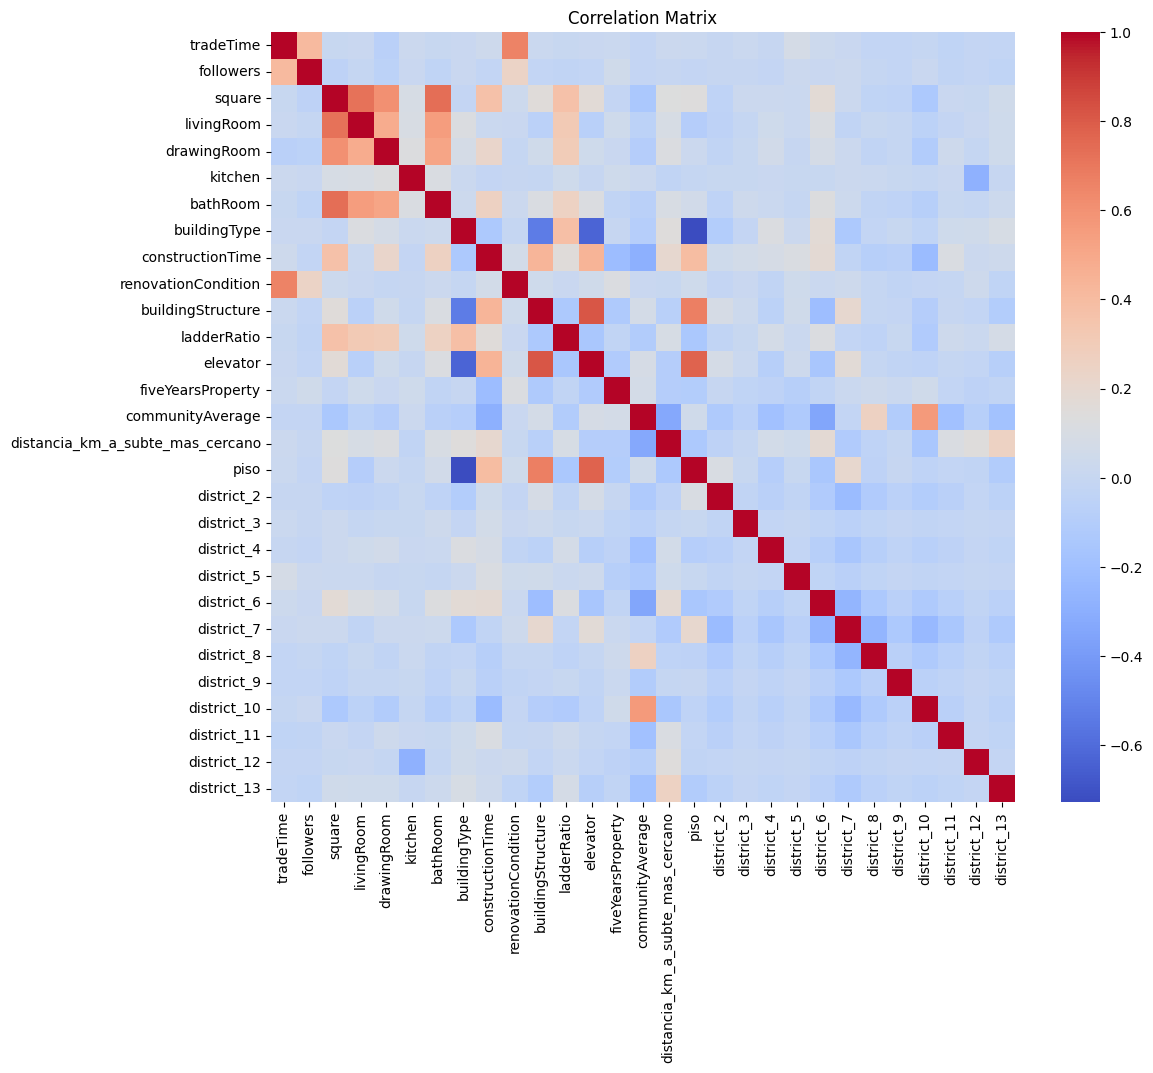

In [16]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Filter for correlations above the threshold
threshold = 0.4
strong_correlations = corr_matrix[abs(corr_matrix) > threshold]

# Display the strong correlations
display(strong_correlations)

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
tradeTime,1.000000,0.410741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
followers,0.410741,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square,NaN,NaN,1.000000,0.722605,0.602871,NaN,0.731103,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
livingRoom,NaN,NaN,0.722605,1.000000,0.480518,NaN,0.551674,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drawingRoom,NaN,NaN,0.602871,0.480518,1.000000,NaN,0.517697,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathRoom,NaN,NaN,0.731103,0.551674,0.517697,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constructionTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
renovationCondition,0.656842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dividimos datos

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

In [19]:
y = y.values

### Modelo 1: regresion lineal multiple simple

Usamos todas las variables

In [20]:
linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linear_model.predict(X_test)

print(f'Middle Square Error = {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root Middle Square Error = {root_mean_squared_error(y_test, y_pred):.2f}')   # Por cuanto erro, en unidades de y
print(f'R2 = {r2_score(y_test, y_pred):.2f}')

Middle Square Error = 1165301789843.67
Root Middle Square Error = 1079491.45
R2 = 0.78


In [22]:
# Vemos variables mas importantes

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X_train, y_train)
print("Selected feature indices:")
lista = X_train.columns[selector.get_support(indices=True)].to_list()
for i in range(len(lista)):
  print(f'{i+1}. {lista[i]}')

Selected feature indices:
1. tradeTime
2. followers
3. square
4. livingRoom
5. drawingRoom
6. bathRoom
7. constructionTime
8. renovationCondition
9. buildingStructure
10. ladderRatio
11. elevator
12. communityAverage
13. distancia_km_a_subte_mas_cercano
14. piso
15. district_4
16. district_6
17. district_8
18. district_10
19. district_11
20. district_13


In [23]:
# Variables menos importantes
[i for i in X.columns if i not in lista]

['kitchen',
 'buildingType',
 'fiveYearsProperty',
 'district_2',
 'district_3',
 'district_5',
 'district_7',
 'district_9',
 'district_12']

### Modelo 2: elevamos el grado del polinomio

In [ ]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 5)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    reg = LinearRegression()
    reg.fit(X_train_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(np.arange(1,31,2))
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

### Modelo 3: agregamos regularizacion (Ridge regularization)